# Exercise Set 1
<h2> IN4080 - 2025 </h2>

*You will probably not manage to work through all of this exercise set during the group session. Continue
to work on it by yourself after the group session and return to the teacher in later group sessions if you
have any questions.*


This exercises requires the following packages:
* Spacy 
* Numpy 
* Pandas
* Matplotlib

## Part 0: Set up a working environment on your PC

Follow the installation instructions on the course web page to set up a working environment on your
own computer.
The following exercises should be solved interactively in Python. We recommend using a Jupyter
Notebook, but you can also work in a standard interactive Python prompt.

### Jupyter notebooks? 
  The Jupyter Notebook is an interactive computing environment. 

  Read about: 
  - [Notebook Basics](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html) 
  - [Running Code](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Running%20Code.html) 


## Part 1: Precpocessing Data with SpaCy

We will work with the book *Peter Pan*, which is available as plain text on Project Gutenberg. 


a) Download the Plain Text UTF-8 file from https://www.gutenberg.org/ebooks/16 and place it in your working
directory. Rename the file if necessary. Open the file in a text editor. Are there any particularities in the document 
that you’ll need to watch out when processing?


*Answer with text here:*
First we want to pay attention to remove the unwanted elememts such as empty lines, and information about Project Gutenberg that is irrelevant to Peter Pan itself. When spliting the text into sentences, we want to be careful about the marks like quotations and those actually not ending a sentence. We also need to make clear decisions on where to split the sentence into tokens, for instance there are words with ' and - . Besides, we also want to decide on the case folding, by keeping the uppercases or normalize them all to lowercases. 


b) This is a Jupyter notebook which is organized into cells. There are essentially two types of cells: text (Markdown)
cells and code cells. You can execute a code cell by clicking on the Play button or by pressing Ctrl+Enter.
Create a code cell below, load in the Peter Pan text, and print the length of the text. What does this number tell you? 


<details>
  <summary>Code Solution</summary>

```python
with open(‘peterpan.txt’, ‘r’, encoding=’utf-8-sig’) as f:
  text = f.read()
  print(len(text))
```
</details> 

In [2]:
with open("peter-pan.txt", "r", encoding="utf-8-sig") as f:
    text = f.read()

print(len(text))

274155


This number tells us the total number of characters(including spaces and punctuations) in the text file.

c) We would now like preprocess the raw text. The NLP pipeline from `SpaCy` does a lot of the heavy lifting for us.
Run the text through the SpaCy pipeline and print out the number of sentences in the resulting `Doc` object.
Does the number of sentences correspond to your expectations? Inspect the data.

[SpaCy Usage Documentation](https://spacy.io/usage)

In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
print("Number of sentences:", len(list(doc.sents)))

Number of sentences: 3016


d) It turns out that the initial text contains a lot of line breaks that make the processing harder than
necessary. Replace all line breaks in the raw text with a space.  

*Hint* use regular expressions and the `re` library.

If you are not familiar with regular expressions, let your teachers know. We won’t need them now, but they 
can come quite handy for a lot of text processing tasks, so it’s worth investing some time in learning the basics…

In [11]:
import re

# Replace all line breaks (\n) with a space
clean_text = re.sub(r"\n", " ", text)

# collapse multiple spaces into one
clean_text = re.sub(r"\s+", " ", clean_text)


Peter Pan [PETER AND WENDY] by J. M. Barrie [James Matthew Barrie] A Millennium Fulcrum Edition produced in 1991 by Duncan Research. Note that while a copyright was initially claimed for the labor involved in digitization, that copyright claim is not consistent with current copyright requirements. This text, which matches the 1911 original publication, is in the public domain in the US. Contents Chapter I. PETER BREAKS THROUGH Chapter II. THE SHADOW Chapter III. COME AWAY, COME AWAY! Chapter IV.


e) Run the new text through the sentence tokenizer again. How do you judge the result? Have new errors been introduced?

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(clean_text)
print("Number of sentences:", len(list(doc.sents)))
print(clean_text)

Number of sentences: 3314
Peter Pan [PETER AND WENDY] by J. M. Barrie [James Matthew Barrie] A Millennium Fulcrum Edition produced in 1991 by Duncan Research. Note that while a copyright was initially claimed for the labor involved in digitization, that copyright claim is not consistent with current copyright requirements. This text, which matches the 1911 original publication, is in the public domain in the US. Contents Chapter I. PETER BREAKS THROUGH Chapter II. THE SHADOW Chapter III. COME AWAY, COME AWAY! Chapter IV. THE FLIGHT Chapter V. THE ISLAND COME TRUE Chapter VI. THE LITTLE HOUSE Chapter VII. THE HOME UNDER THE GROUND Chapter VIII. THE MERMAIDS’ LAGOON Chapter IX. THE NEVER BIRD Chapter X. THE HAPPY HOME Chapter XI. WENDY’S STORY Chapter XII. THE CHILDREN ARE CARRIED OFF Chapter XIII. DO YOU BELIEVE IN FAIRIES? Chapter XIV. THE PIRATE SHIP Chapter XV. “HOOK OR ME THIS TIME” Chapter XVI. THE RETURN HOME Chapter XVII. WHEN WENDY GREW UP Chapter I. PETER BREAKS THROUGH All chi

## Part 2: Frequency distributions and Pandas

In this exercise set, we want to study the frequency distributions of words in the text.
Python provides a Counter class that counts repeated elements in a list and stores the counts as a
dictionary. We can set up the counter, get the most common elements, and the count for a specific element as follows:

```python
import collections

c = collections.Counter(tokens)
print(c.most_common(10))
print(c['with'])
```

a) Print out the 10 most frequent tokens in the text.


In [25]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(clean_text)  
tokens = [token.text.lower() for token in doc] 

import collections

c = collections.Counter(tokens)
print(c.most_common(10))
print(c['with'])

[(',', 3976), ('.', 2789), ('the', 2519), ('and', 1479), ('”', 1463), ('“', 1462), ('to', 1275), ('he', 1060), ('a', 988), ('of', 973)]
373


b) You will see that punctuation marks are among the most frequent items in the result. Remove them from the counter.

<details>
<summary> Hints </summary>
	<ul>
		<li> <code>string.punctuation</code> contains a list of punctuation symbols (you’ll need to import string first)</li>
		<li>You can delete the 'and' item from the counter with <code>del c[‘and’]</code>.</li>
	</ul>
</details>


In [28]:
import string
print(string.punctuation)

for p in string.punctuation:
    if p in c:
        del c[p]

print(c.most_common(10))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
[('the', 2519), ('and', 1479), ('to', 1275), ('he', 1060), ('a', 988), ('of', 973), ('was', 937), ('it', 836), ('in', 737), ('that', 647)]


In [29]:
del c['and']
print(c.most_common(10))

[('the', 2519), ('to', 1275), ('he', 1060), ('a', 988), ('of', 973), ('was', 937), ('it', 836), ('in', 737), ('that', 647), ('she', 602)]


c) It would be nice if we could display the frequency distribution as a nicely formatted table. Let us use a
DataFrame from the Pandas package for this. In general, it is easy to populate a DataFrame with the
contents of a Python dictionary, as in the following code snippet:

```python
import pandas as pd

d = {‘apple’: 5, ‘orange’: 8, ‘banana’: 51, ‘strawberry’: 20}
df = pd.DataFrame(d.items(), columns=['fruit', 'number'])

df.head()    # Display the first rows
```

You can do the same with your word counter.  

How many types and how many tokens does the text contain? What is its type-token-ratio?


In [35]:
import pandas as pd

df = pd.DataFrame(c.items(), columns=['token', 'count'])
df = df.sort_values(by="count", ascending=False).reset_index(drop=True) # drop the old row index

df.head()    

,token,count
0,the,2519
1,to,1275
2,he,1060
3,a,988
4,of,973


In [36]:
tokens = sum(c.values())   # all words counted
types = len(c)             # unique words
ttr = types / tokens

print("Tokens:", tokens)
print("Types:", types)
print("TTR:", round(ttr, 4))


Tokens: 49682
Types: 5240
TTR: 0.1055


d) With Pandas, you can easily select rows of a dataframe according to a particular criterion. For example,
this command displays all words that occur ten times or more:

```python
df[df[‘count’] >= 10]
```

How many hapaxes are in the dataset? What percentage of all word types are hapaxes?
How many word types start with upper case A?

In [45]:
hapaxes = [w for w, count in c.items() if count == 1]
num_hapaxes = len(hapaxes)
print("Number of hapaxes:", num_hapaxes)

perc_hapaxes = num_hapaxes / len(c) * 100
print("Percentage of all types that are hapaxes:", round(perc_hapaxes, 2), "%")


Number of hapaxes: 2568
Percentage of all types that are hapaxes: 49.01 %


## Part 3: Plotting with Matplotlib

Matplotlib is a package for making plots and figures in Python. When using Jupyter notebooks, the plots
are directly displayed in the notebook. This code snippet generates a simple plot:

```python 
import numpy as np
import matplotlib.pyplot as plt

numbers = np.arange(10)
print(numbers)
plt.plot(numbers)
```

[0 1 2 3 4 5 6 7 8 9]


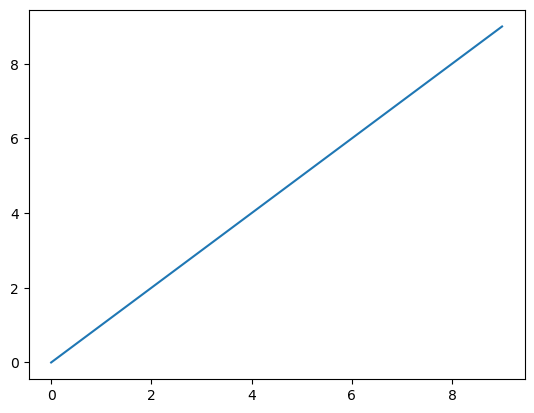

In [41]:
import numpy as np
import matplotlib.pyplot as plt

numbers = np.arange(10)
print(numbers)
plt.plot(numbers)

a) Let us create a plot from our frequency distribution. You can directly use the `plot()` method of the
dataframe as follows:

```python
df = df.sort_values('count', ascending=False)
df.plot(x='word', y='count')
```

Does the result of this plot correspond to your expectations? 

<Axes: xlabel='token'>

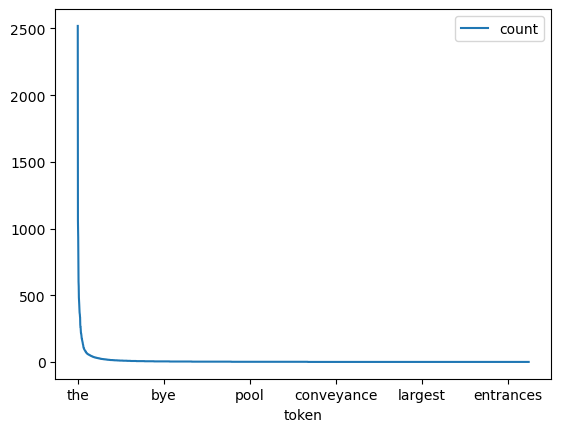

In [43]:
df = df.sort_values('count', ascending=False)
df.plot(x='token', y='count')

b) Let's make some more visualizations. 

* Modify the command to only display the 20 most frequent words. 
* Try to display all words on the x-axis.
* For frequency plots, it is more natural to use bar charts. Switch the type of the plot with the `kind='bar'` parameter.

<Axes: xlabel='token'>

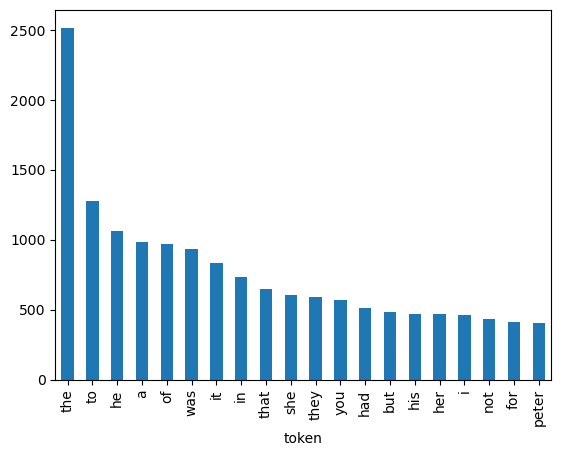

In [47]:
top20 = df.head(20)
top20.plot(x='token', y='count', kind='bar', legend=False)


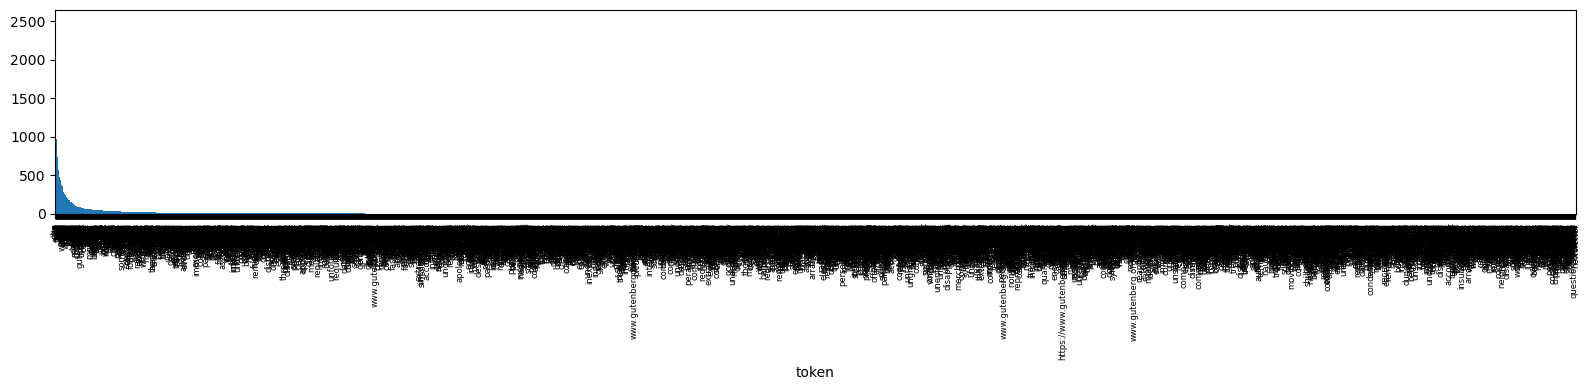

In [51]:
import matplotlib.pyplot as plt

ax = df.plot(x='token', y='count', kind='bar', legend=False, figsize=(16,4), width=1)
plt.xticks(rotation=90, fontsize=6)  # make labels tiny so they (barely) fit
plt.tight_layout() 


c) Zipf’s law states that the product of the frequency of a word and of its rank is approximately constant.
Let us verify this law on a subset of our frequency distribution. Select the 2000 first words of the
sorted frequency table. Reset the indices in the resulting dataframe so that we can use each index for the rank. Now, add a new column with the product of rank and frequency.

<details>
<summary>Hints</summary>

```python
	df_zipf = df[:2000].reset_index(drop=True) 
	df_zipf['z'] = df_zipf.index.values * df_zipf['Count']
```
</details>

What are the highest, lowest and average values of z that you observe? Plot the z values as a line chart.

In [54]:
df_zipf = df[:2000].reset_index(drop=True) 
df_zipf['rank'] = df_zipf.index + 1

# z = rank * frequency
df_zipf['z'] = df_zipf['rank'] * df_zipf['count']

# Highest, lowest, average z
z_max = df_zipf['z'].max()
z_min = df_zipf['z'].min()
z_mean = df_zipf['z'].mean()

print("z (max):", z_max)
print("z (min):", z_min)
print("z (mean):", round(z_mean, 2))


z (max): 9436
z (min): 2519
z (mean): 5199.79


<Axes: xlabel='rank'>

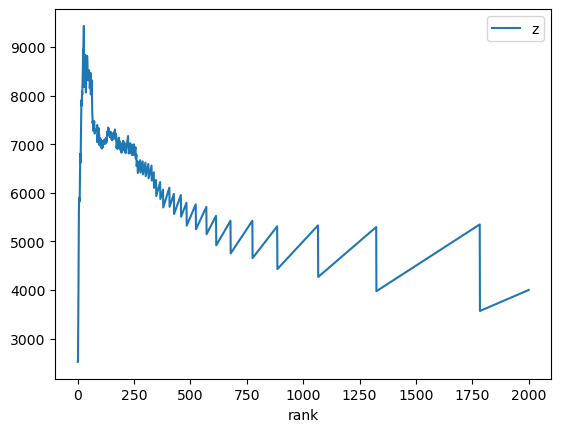

In [58]:
df_zipf.plot(x='rank', y='z', kind='line')
